In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('abc.csv', parse_dates = ['date'],index_col = 'date')
df.head()

,so2,no2,rspm,spm
date,,,,
2004-01-01,6.433505,58.231014,238.330000,398.000000
2004-01-02,6.433505,58.231014,182.915000,346.500000
2004-01-03,6.433505,58.231014,136.960411,343.926778
2004-01-04,6.433505,58.231014,136.960411,343.926778
2004-01-05,6.433505,58.231014,160.000000,340.000000


In [3]:
w = [5,43,133,201] #these values are taken as per the Indian standards
w_sum = 0
for i in range(0,len(w)):
    w_sum += w[i]

w_ratio = []
for i in range(len(w)):
    x = float(w[i])/float(w_sum)
    w_ratio.append(x)
print(w_ratio)

[0.013089005235602094, 0.112565445026178, 0.3481675392670157, 0.5261780104712042]


In [4]:
s = [50,40,60,40] 
list_aqi = []
conc = []

for index,row in df.iterrows():
    # concentration (mean/median) for each pollutant
    conc = [ row['so2'], row['no2'], row['spm'], row['rspm'] ]
    
    # calculating pollution index
    q = []
    for i in range(0,4):
        z = s[i]*conc[i]/100
        q.append(z)
    
    #AQI calculation
    aqi = 0
    for i in range(0,4):
        aqi += q[i]*w_ratio[i]
    
    list_aqi.append(aqi)
    
# loading the calculated AQI in the dataframe
df['aqi'] = np.array(list_aqi)

In [6]:
#rcParams['figure.figsize'] = 18,5
import matplotlib.pyplot as plt
yearly_data = df.groupby(by = df.index.year)
for year in yearly_data.groups:
    plt.plot(yearly_data.get_group(year).index.month, yearly_data.get_group(year).aqi, label=year)
    plt.title("Data for the year - " + str(year))
    axes = plt.gca()
    axes.set_xlim([0,13])
    plt.grid()
    plt.legend()
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

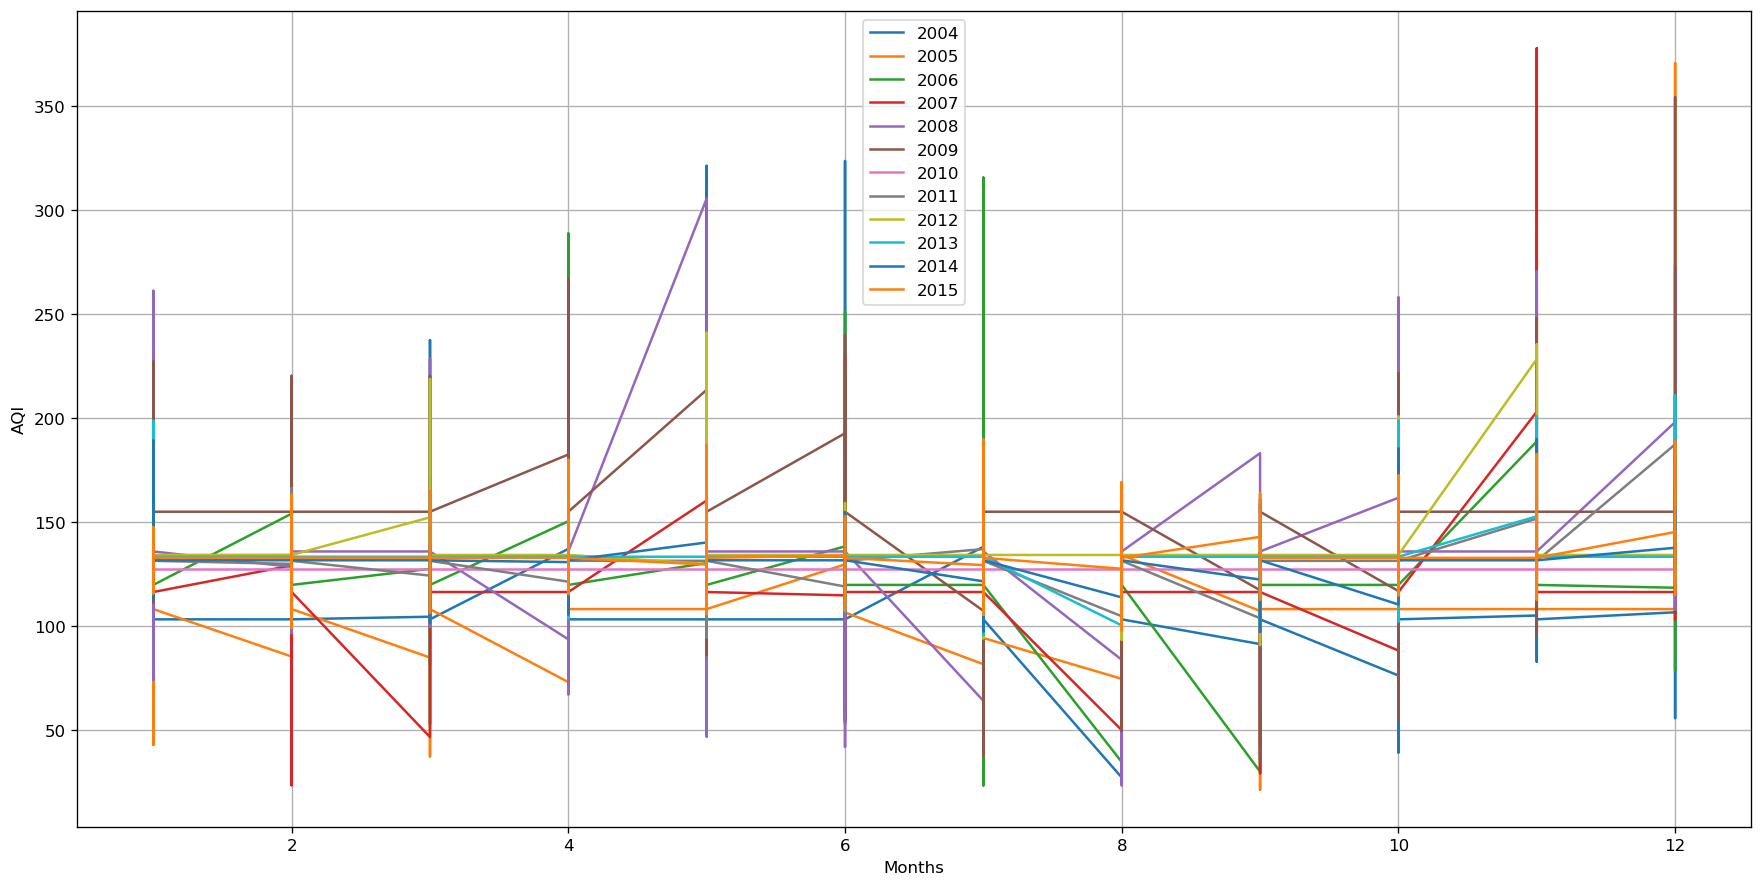

In [7]:
from pylab import rcParams
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
rcParams['figure.figsize'] = 18,9
yearly_data = df.groupby(by = df.index.year)
for year in yearly_data.groups:
    plt.plot(yearly_data.get_group(year).index.month, yearly_data.get_group(year).aqi, label=year)

#plt.plot(seasonal, color="black", label='Mean Seasonality in a year')
plt.grid()
plt.legend()
plt.xlabel('Months')
plt.ylabel('AQI')
plt.show()

In [8]:
aqi = df['aqi'].resample('Y', how='mean')

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [9]:
aqi = aqi.to_dict()

In [10]:
aqi

{Timestamp('2004-12-31 00:00:00', freq='A-DEC'): 103.33673085400395,
 Timestamp('2005-12-31 00:00:00', freq='A-DEC'): 108.26197471671513,
 Timestamp('2006-12-31 00:00:00', freq='A-DEC'): 119.86972000432729,
 Timestamp('2007-12-31 00:00:00', freq='A-DEC'): 116.46146440212792,
 Timestamp('2008-12-31 00:00:00', freq='A-DEC'): 135.9362152760782,
 Timestamp('2009-12-31 00:00:00', freq='A-DEC'): 155.02526650885008,
 Timestamp('2010-12-31 00:00:00', freq='A-DEC'): 127.50543140034338,
 Timestamp('2011-12-31 00:00:00', freq='A-DEC'): 131.44358169858575,
 Timestamp('2012-12-31 00:00:00', freq='A-DEC'): 134.26244312463575,
 Timestamp('2013-12-31 00:00:00', freq='A-DEC'): 133.4080132014324,
 Timestamp('2014-12-31 00:00:00', freq='A-DEC'): 131.69793508610243,
 Timestamp('2015-12-31 00:00:00', freq='A-DEC'): 132.8810057499628}

In [11]:
ini_list = ['2004', '2005', '2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015']
aqi_new = dict(zip(ini_list, list(aqi.values())))

In [12]:
aqi_new

{'2004': 103.33673085400395,
 '2005': 108.26197471671513,
 '2006': 119.86972000432729,
 '2007': 116.46146440212792,
 '2008': 135.9362152760782,
 '2009': 155.02526650885008,
 '2010': 127.50543140034338,
 '2011': 131.44358169858575,
 '2012': 134.26244312463575,
 '2013': 133.4080132014324,
 '2014': 131.69793508610243,
 '2015': 132.8810057499628}